In [5]:
import numpy as np                      
import pandas as pd                     
import os                               
import cv2                              
import matplotlib.pyplot as plt         
from tqdm.notebook import tqdm          
from sklearn.utils import shuffle       

from tensorflow.keras.models import load_model
from tensorflow.keras import applications           
from tensorflow.keras import optimizers            
from tensorflow.keras.utils import to_categorical   
from tensorflow.keras.models import Sequential, Model, load_model 
from tensorflow.keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
foldernames = os.listdir('./training-data')
categories = []
files = []
i = 0
for k, folder in enumerate(foldernames):
    filenames = os.listdir("./training-data/" + folder);
    for file in filenames:
        files.append("./training-data/" + folder + "/" + file)
        categories.append(k)
        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})
train_df = pd.DataFrame(columns=['filename', 'category'])
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

train_df.head()
train_df = train_df.reset_index(drop=True)
train_df

,filename,category
0,./training-data/butterfly/e030b20928e90021d85a...,0
1,./training-data/butterfly/e030b20929e90021d85a...,0
2,./training-data/butterfly/e030b2092be90021d85a...,0
3,./training-data/butterfly/e030b2092ce90021d85a...,0
4,./training-data/butterfly/e030b2092de90021d85a...,0
...,...,...
4995,./training-data/squirrel/OIP-DLuAMgbGGOGW0r49p...,9
4996,./training-data/squirrel/OIP-DlVY-0x9uqexVnZY_...,9
4997,./training-data/squirrel/OIP-DlwICIPtlrWDrdz6v...,9
4998,./training-data/squirrel/OIP-DL_IigTXGyMfa6OEn...,9


In [7]:
y = train_df['category']
x = train_df['filename']
y = train_df['category']

x, y = shuffle(x, y, random_state=8) 

In [8]:
def centering_image(img):
    size = [256,256]
    
    img_size = img.shape[:2]
    
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized

images = []
with tqdm(total=len(train_df)) as pbar:
    for i, file_path in enumerate(train_df.filename.values):
        img = cv2.imread(file_path)
        print(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        img = centering_image(cv2.resize(img, dsize=tile_size))

        img = img[16:240, 16:240]
        images.append(img)
        pbar.update(1)

images = np.array(images)

./training-data/butterfly/e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e030b2092be90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e030b2092de90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e030b20a20e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/e132b60e2af51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
./training-data/butterfly/e134b50a2efc1c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
./training-data/butterfly/e830b30a20f5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png
./training-data/butterfly/e830b30a20f6033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
./training-data/butterfly/e830b30a20f6

./training-data/butterfly/ea36b00829f0043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b0082af5053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b0092bfd073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b00a28f1043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b00a2af3023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b00d29f4033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b00d2af2013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b00d2bf4003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b00d2bf5083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea36b00d2bf6023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training

./training-data/butterfly/ea36b7062cf3073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7062cf6073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea36b7062cfc023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7072ef5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7072ff0003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7072ff0013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7072ff0023ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea36b7072ff0033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea36b7072ff0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea36b7072ff7063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training

./training-data/butterfly/ea37b70e21f6043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/ea37b8062af1073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea37b8062af6073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b8062afd023ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea37b8062afd053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b80720f2043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b80720f4073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b80821f7063ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b80a28f6073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training-data/butterfly/ea37b80a28f6083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg
./training

./training-data/butterfly/ec33b50a2ef01c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
./training-data/butterfly/ec34b50b21f21c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
./training-data/butterfly/ec36b40a29e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/ed31b9072ae90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/ed33b50f2ff21c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
./training-data/butterfly/ed35b5082bf51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
./training-data/butterfly/ed36b10d28f71c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
./training-data/butterfly/ed36b10f20e90021d85a5854ee454296eb70e3c818b413449df6c87fa7ee_640.jpg
./training-data/butterfly/ed36b5072be90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg
./training-data/butterfly/ed3cb00e2ef21c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg
./training-data/butterfly/ed3db50b2af7

./training-data/cat/1220.jpeg
./training-data/cat/1221.jpeg
./training-data/cat/1222.jpeg
./training-data/cat/1223.jpeg
./training-data/cat/1224.jpeg
./training-data/cat/1225.jpeg
./training-data/cat/1226.jpeg
./training-data/cat/1227.jpeg
./training-data/cat/1228.jpeg
./training-data/cat/1229.jpeg
./training-data/cat/123.jpeg
./training-data/cat/1230.jpeg
./training-data/cat/1231.jpeg
./training-data/cat/1232.jpeg
./training-data/cat/1233.jpeg
./training-data/cat/1234.jpeg
./training-data/cat/1235.jpeg
./training-data/cat/1236.jpeg
./training-data/cat/1237.jpeg
./training-data/cat/1238.jpeg
./training-data/cat/1239.jpeg
./training-data/cat/124.jpeg
./training-data/cat/1240.jpeg
./training-data/cat/1241.jpeg
./training-data/cat/1242.jpeg
./training-data/cat/1243.jpeg
./training-data/cat/1244.jpeg
./training-data/cat/1245.jpeg
./training-data/cat/1246.jpeg
./training-data/cat/1247.jpeg
./training-data/cat/1248.jpeg
./training-data/cat/125.jpeg
./training-data/cat/1250.jpeg
./training-da

./training-data/chicken/102.jpeg
./training-data/chicken/1020.jpeg
./training-data/chicken/1021.jpeg
./training-data/chicken/1023.jpeg
./training-data/chicken/1024.jpeg
./training-data/chicken/1026.jpeg
./training-data/chicken/1028.jpeg
./training-data/chicken/103.jpeg
./training-data/chicken/1030.jpeg
./training-data/chicken/1031.jpeg
./training-data/chicken/1032.jpeg
./training-data/chicken/1033.jpeg
./training-data/chicken/1034.jpeg
./training-data/chicken/1035.jpeg
./training-data/chicken/1039.jpeg
./training-data/chicken/1041.jpeg
./training-data/chicken/1042.jpeg
./training-data/chicken/1043.jpeg
./training-data/chicken/1044.jpeg
./training-data/chicken/1045.jpeg
./training-data/chicken/1047.jpeg
./training-data/chicken/1048.jpeg
./training-data/chicken/105.jpeg
./training-data/chicken/1050.jpeg
./training-data/chicken/1051.jpeg
./training-data/chicken/1052.jpeg
./training-data/chicken/1053.jpeg
./training-data/chicken/1054.jpeg
./training-data/chicken/1059.jpeg
./training-data/c

./training-data/chicken/582.jpeg
./training-data/chicken/583.jpeg
./training-data/chicken/584.jpeg
./training-data/chicken/586.jpeg
./training-data/chicken/588.jpeg
./training-data/chicken/590.jpeg
./training-data/chicken/591.jpeg
./training-data/chicken/593.jpeg
./training-data/chicken/594.jpeg
./training-data/chicken/595.jpeg
./training-data/chicken/599.jpeg
./training-data/chicken/6.jpeg
./training-data/chicken/60.jpeg
./training-data/chicken/600.jpeg
./training-data/chicken/601.jpeg
./training-data/chicken/602.jpeg
./training-data/chicken/603.jpeg
./training-data/chicken/604.jpeg
./training-data/chicken/605.jpeg
./training-data/chicken/606.jpeg
./training-data/chicken/607.jpeg
./training-data/chicken/609.jpeg
./training-data/chicken/610.jpeg
./training-data/chicken/611.jpeg
./training-data/chicken/613.jpeg
./training-data/chicken/619.jpeg
./training-data/chicken/62.jpeg
./training-data/chicken/628.jpeg
./training-data/chicken/630.jpeg
./training-data/chicken/635.jpeg
./training-dat

./training-data/cow/OIP-1F0PqZFf2WcgnSxi6NnJcwHaFb.jpeg
./training-data/cow/OIP-1FbU_lujEg5exq1cPCmSmAHaFV.jpeg
./training-data/cow/OIP-1FOgjD7WAsg3QjHo2VeZQAHaC8.jpeg
./training-data/cow/OIP-1HaCHFv2gyxfG0ZaMT8qtgHaFk.jpeg
./training-data/cow/OIP-1hSIgzGdBweAlnjTuQVZ6AHaKG.jpeg
./training-data/cow/OIP-1hS_06m-_uOxvVd8iK_-PQHaG3.jpeg
./training-data/cow/OIP-1irfBSzjuW_IKzpr03VkegHaFH.jpeg
./training-data/cow/OIP-1Jl6a3q2xMTNnc4nywKROwHaE8.jpeg
./training-data/cow/OIP-1nGEToCC9uSP59gwcHp5OwHaFP.jpeg
./training-data/cow/OIP-1NxvGWjwzbEej8_ANg-xpAHaGB.jpeg
./training-data/cow/OIP-1OdfTFjfbPcdyp2rjW3JtgHaFB.jpeg
./training-data/cow/OIP-1ousJgS026f4njgA0KoICwHaE7.jpeg
./training-data/cow/OIP-1PS7kGhnuGKxDM1B3L-jWwHaFj.jpeg
./training-data/cow/OIP-1qRPzXH-kcEidmUI_wbdaAAAAA.jpeg
./training-data/cow/OIP-1UcpyPpp0fHKdysQn5hPaQHaD3.jpeg
./training-data/cow/OIP-1vHrZWIs0xyKNJABuiSamAHaEO.jpeg
./training-data/cow/OIP-1W2VYqBUs_SlHpNbYXrLnQHaFj.jpeg
./training-data/cow/OIP-1WYuq2Nn0ZkS-DptHGSpqQHa

./training-data/cow/OIP-8V9_3VNi56xXqzAk2OBS2gHaE-.jpeg
./training-data/cow/OIP-8xopjI-uVYOTbF8e_PVYrgGMCd.jpeg
./training-data/cow/OIP-8ziDhe9_X3WF7__-m15HVgHaEo.jpeg
./training-data/cow/OIP-8_zgdxfbHPditvk7dlI2ewHaHZ.jpeg
./training-data/cow/OIP-991Ovfczr7TuKWRw0a9PBQHaFj.jpeg
./training-data/cow/OIP-9ahuXBUuBhX-yMOs0hlTWwHaFj.jpeg
./training-data/cow/OIP-9CRHNG768VumZpjBig7bQQHaE8.jpeg
./training-data/cow/OIP-9dD9Fn8Xe0wkzX-APVmqBQHaFe.jpeg
./training-data/cow/OIP-9Dxk2-FlgbeuFXxM2kxwqwHaE8.jpeg
./training-data/cow/OIP-9FHJ8IMu81PETHcHAD68rgHaG2.jpeg
./training-data/cow/OIP-9gTFaTmu4tGFmiNPMCrQNAHaCc.jpeg
./training-data/cow/OIP-9j5GXK7A6iYgBJ7xmwyVbQHaE8.jpeg
./training-data/cow/OIP-9JR-d-IH3HfqKb2KBs7y_gHaE8.jpeg
./training-data/cow/OIP-9KCPE2uR23UbIIlbpwuqxAHaD4.jpeg
./training-data/cow/OIP-9l4uKfJJWNIzDLp_39UupAHaEX.jpeg
./training-data/cow/OIP-9P9yTrfWTWb6ZjdF3s_NrQHaHa.jpeg
./training-data/cow/OIP-9pA7_NvvLtLDQ2Bi7TTaNwHaE8.jpeg
./training-data/cow/OIP-9q3ArgfjoAwQ5Zk8NQvgiAHa

./training-data/dog/OIP--iVoSrHMWX0IG2rxuA5CsgHaFj.jpeg
./training-data/dog/OIP--j4ILLV3OBiP1WFx0l7GiQHaFc.jpeg
./training-data/dog/OIP--jqyES48oZ9OFI3kFadEggHaEk.jpeg
./training-data/dog/OIP--khXa4p9B3QV8JmsHX29hgHaEK.jpeg
./training-data/dog/OIP--KlpwG173pm-gl9aWQkm9gHaE8.jpeg
./training-data/dog/OIP--L1ZAWylA3UTTMGC0_WF0wHaIA.jpeg
./training-data/dog/OIP--LafQFfr5Kd-NMLdQYKKNQHaER.jpeg
./training-data/dog/OIP--lnCqw9ajSJK5CxuFZo2TwHaFb.jpeg
./training-data/dog/OIP--lQutAM-FwDERp0chM2rCgHaE8.jpeg
./training-data/dog/OIP--LSF87v0ehcSg4hzc4Qy7QHaE8.jpeg
./training-data/dog/OIP--MffROkglTy0W_sVV_zv3AHaFY.jpeg
./training-data/dog/OIP--MG1FExhD4u9GX_Vny2QXwHaFj.jpeg
./training-data/dog/OIP--msqs5Bmw4nKoAAq10fZCQHaNd.jpeg
./training-data/dog/OIP--MZDf-NwE7MF-xL9nqrSgwHaFj.jpeg
./training-data/dog/OIP--mZiyU8uZ1LLjoPmCykXSgHaLO.jpeg
./training-data/dog/OIP--NBX8JVZ8wy9KtVr-cblGgHaJ4.jpeg
./training-data/dog/OIP--NTohQi3Ctvo0vRUTVNHTQHaFj.jpeg
./training-data/dog/OIP--oBsJIeAn_f5_DI1XJ9O6wHa

./training-data/dog/OIP-2cpY38EdkNC-t5stYHXxngHaHa.jpeg
./training-data/dog/OIP-2DmloarkBrL5O8GncBRb8QHaFj.jpeg
./training-data/dog/OIP-2dnsLaaLAtgn0_xNOfWTEAHaE7.jpeg
./training-data/dog/OIP-2DXm3H_0HI0v_ZhQ_aeIJAHaHb.jpeg
./training-data/dog/OIP-2EvaXk6PG-nKvAfygNts0gHaFK.jpeg
./training-data/dog/OIP-2F6xTTkDAB32x0WLySE2JQHaEt.jpeg
./training-data/dog/OIP-2Fjy2FHyCwrAs46mSDZrZgHaEm.jpeg
./training-data/dog/OIP-2F_nq8Y33HI7wNayJckv5gHaFj.jpeg
./training-data/dog/OIP-2geIdrgZ-J42JJ7LikApVQHaEo.jpeg
./training-data/dog/OIP-2GxP1nlILPlvoEy3S-HTqQHaIi.jpeg
./training-data/dog/OIP-2hvLnuUg20KCF-IaaXXXfwHaF6.jpeg
./training-data/dog/OIP-2JCHRqKve3bRpIHN33ySPwAAAA.jpeg
./training-data/dog/OIP-2jCuAgFf94eL_T2nHITUHwHaGp.jpeg
./training-data/dog/OIP-2jI6ZD5isnTyKelZECdNWAHaE8.jpeg
./training-data/dog/OIP-2jq8GZqv9tScQ1UT8u0rcwHaFj.jpeg
./training-data/dog/OIP-2JqPhnRaNplbNU-a-CgvgQHaGQ.jpeg
./training-data/dog/OIP-2KOy2hmC0cAe1-Ubcr2pfwHaHa.jpeg
./training-data/dog/OIP-2lutMf73w0MUzUepAk9JcgHa

./training-data/dog/OIP-5-SGZKQFdCsk48KxF6iczgHaGV.jpeg
./training-data/dog/OIP-5-ZtMQdQbExlbNYcl1VzqAHaG-.jpeg
./training-data/dog/OIP-509oLsA3h-cs38SEj-humQHaE8.jpeg
./training-data/dog/OIP-50Dn8-P05QnZKxqgVBbnaQHaFA.jpeg
./training-data/dog/OIP-50yTUWpiL0nkvc7DKYjxwQHaGr.jpeg
./training-data/dog/OIP-51jFu05q2G6kb2ys6OROkQHaGd.jpeg
./training-data/dog/OIP-51urDTf1Ymldk8U9KnfUVwAAAA.jpeg
./training-data/dog/OIP-52zmgcvU4h-0bB-VN7r-vAHaJ4.jpeg
./training-data/dog/OIP-54-XMrTbroJ00fwu3f5ocwHaFj.jpeg
./training-data/dog/OIP-54QXDLiGu1vMTGeIa0DwlwHaE9.jpeg
./training-data/dog/OIP-55-53tiTaa0bBrS8_TS0YgHaFj.jpeg
./training-data/dog/OIP-55hDSsilOP8Dj150qYbq0QHaEK.jpeg
./training-data/dog/OIP-55lzWkU0-r5AX_D_xu5JUAHaEK.jpeg
./training-data/dog/OIP-55MBFKL5zpti-QqONhDWXAHaHZ.jpeg
./training-data/dog/OIP-5aAuf7zE981I3vFNcu-C7QHaFj.jpeg
./training-data/dog/OIP-5aI37TIuEEQgo5Olqp1VQwHaFj.jpeg
./training-data/dog/OIP-5BjM-bq7ytNGVhMv83ap-AHaFj.jpeg
./training-data/dog/OIP-5c8U_LpbyHZ8cy0CmzM9xwHa

./training-data/elephant/e83cb20c2bf6083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/e83cb3082df5043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e83cb60828f5043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/e83cb70929f71c22d2524518b7444f92e37fe5d404b0144390f8c07aa5ecb6_640.jpg
./training-data/elephant/e83db30d2cfc003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/e83db30d2cfd033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/e83db30d2cfd053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e83db30d2df5073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e83db30d2df6043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/e83db30d2df6053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elepha

./training-data/elephant/ea37b70e21f4083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/ea37b8082af5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/ea37b80b21f3093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/ea37b80b21fc053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/ea37b80d2ff1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/ea37b90c2efc083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb30b0092af1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb30b0092bf0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb30b20d20f4023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb30b20d2ef2063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elep

./training-data/elephant/eb3cb00f2afd073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb10c2ef5063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb10e28f7073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb10f2cfd043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb3cb20628f1053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb20c28f4053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb30728fd003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb3cb30c21f4073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb3cb30c21f5013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb3cb30c21f5023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elep

./training-data/horse/OIP--1hNp1smpwT06GTxZbUVwgHaFi.jpeg
./training-data/horse/OIP--1iQSsCUgn4E10K_tST_QwHaHa.jpeg
./training-data/horse/OIP--2wbTZUIHhYse3zlp1S4WQHaJ3.jpeg
./training-data/horse/OIP--5YhTv41EQikJq2qdaMQ0AHaF8.jpeg
./training-data/horse/OIP--5_9K_rWa3brAsTjGCbktAHaFj.jpeg
./training-data/horse/OIP--7-usponNbvCN-VhqThI1gHaFj.jpeg
./training-data/horse/OIP--BuRX5V0-i4g8evlD94KKwHaFq.jpeg
./training-data/horse/OIP--bZauzMFiEWbhnpLCGo91AHaFj.jpeg
./training-data/horse/OIP--DjA-ZGzy7HvZtP0KyVSqgHaGi.jpeg
./training-data/horse/OIP--gZsS7YbGvBLaXsRywLmBAHaFg.jpeg
./training-data/horse/OIP--Hoe5PVuFl7QUqfg5SYNWwHaFj.jpeg
./training-data/horse/OIP--ICjd6ds94Og8HgSRyk9pAAAAA.jpeg
./training-data/horse/OIP--igbLC0U8z3lMx4r2Lc5ZQHaFN.jpeg
./training-data/horse/OIP--jy2_p3NvNX51l-FNfOPzAHaFj.jpeg
./training-data/horse/OIP--KoA4H6aGYmZenBhKRUXKAAAAA.jpeg
./training-data/horse/OIP--l2ukYr0WsiWs3pm7fCl0AHaGp.jpeg
./training-data/horse/OIP--mg1RcXZohCaxbeBdu70jwHaHt.jpeg
./training-dat

./training-data/horse/OIP-4Jvmk5ADTcVIZ7WHp6D4UgHaFj.jpeg
./training-data/horse/OIP-4Kh3WfVGTQn6Zc8j06M6OQHaF7.jpeg
./training-data/horse/OIP-4ksjeL5UZQU-ytG9o0PO0QHaFj.jpeg
./training-data/horse/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
./training-data/horse/OIP-4lB4b6mm-g77iXtaXg6tkwHaG4.jpeg
./training-data/horse/OIP-4LyoWj1QteSqMLLwcXpXOgHaEL.jpeg
./training-data/horse/OIP-4mLt60dxpq0pgKplk3nncQHaFL.jpeg
./training-data/horse/OIP-4q4ygfRy0jZI7zsZBJosRgAAAA.jpeg
./training-data/horse/OIP-4Q9qGyzqJFlmpuoYGRl8XwHaFj.jpeg
./training-data/horse/OIP-4qAVOUzc7ywGcHkwdc3OdAHaFi.jpeg
./training-data/horse/OIP-4qPU4AZycLZlpRyqN3qq4gHaFt.jpeg
./training-data/horse/OIP-4Q_zWR5btDSQTbDTQatS3gHaEc.jpeg
./training-data/horse/OIP-4rEZcalQFJMV3PWn6_7O6QHaGC.jpeg
./training-data/horse/OIP-4RFPMOqoG0X48MH3Nk-cdwHaE7.jpeg
./training-data/horse/OIP-4tfVcQudu4ULtmOmPf1muAAAAA.jpeg
./training-data/horse/OIP-4ty2a-5B5NdPRO9f1--5GAHaGH.jpeg
./training-data/horse/OIP-4u9bxBs-8uwjFyo4wj_eSQHaFZ.jpeg
./training-dat

./training-data/horse/OIP-9i-fqomB5O8got4VC2M9UAAAAA.jpeg
./training-data/horse/OIP-9IjgcwgvaDpyA5DOmbRLLgHaFj.jpeg
./training-data/horse/OIP-9InnwuXDbsBxGHaAKWwxsAHaE8.jpeg
./training-data/horse/OIP-9Iz6cMMuGFVO4EDrE6JffAHaDl.jpeg
./training-data/horse/OIP-9kRsqMpinTm4kTXjwnh7GAHaEG.jpeg
./training-data/horse/OIP-9l6h__mLGnFaHDVMxbzzUQHaFj.jpeg
./training-data/horse/OIP-9LSQoJyNKe2UJM3eMI1Y-QHaFS.jpeg
./training-data/horse/OIP-9LX4L1AG2e75g98RdSmZagAAAA.jpeg
./training-data/horse/OIP-9m5evzqf8i5AMmgoubljogHaGG.jpeg
./training-data/horse/OIP-9mSm2R5eNlOaOS2xF14iQgHaGP.jpeg
./training-data/horse/OIP-9N3Mfe7H_DoIOr5wQM-LhAHaFh.jpeg
./training-data/horse/OIP-9N4pM-_7zLzoH0CeccQmQAHaGE.jpeg
./training-data/horse/OIP-9Q7OOSZYxEWnnleuRXvtNAHaEK.jpeg
./training-data/horse/OIP-9QcSEQILOS-1d6s_DBsMFQHaFP.jpeg
./training-data/horse/OIP-9Q_ovvrlonW-kbzgFf8DjQHaKT.jpeg
./training-data/horse/OIP-9sFa3csY9lIyZNbRv1DIXgAAAA.jpeg
./training-data/horse/OIP-9svlNZpfrgD_PvaCdU4-RAHaLQ.jpeg
./training-dat

./training-data/sheep/e836b30c21f4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e836b30f21f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e836b40c2af1003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e836b40c2af2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/e836b8062cf7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e836b80729fd083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/e837b10f2df7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e837b5092af4053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/e837b90621f6083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/e83cb2072af51c22d2524518b7444f92e37fe5d404b0144390f8c078a2e8bc_640.jpg
./training-data/sheep/e83cb60c2df1033ed1584d05fb1d4e

./training-data/sheep/ea37b10720f3083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b10720f3093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/ea37b10720fc063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/ea37b10720fd093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b10f2efc073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/ea37b20f2ef01c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg
./training-data/sheep/ea37b4072bfc013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b40b2ef5013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b40b2ff6043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b40b2ff6093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/ea37b40e2cf4003ed1584d05fb1d4e

./training-data/sheep/eb35b2082ff6073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb35b50921f01c22d2524518b7444f92e37fe5d404b0144390f8c078a2e8bc_640.jpg
./training-data/sheep/eb35b6062efc023ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb35b70829f7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/eb35b70a2ff3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/eb35b80a2ef6053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/eb36b00b2ff6013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb36b10e2df1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb36b10e2df2003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/eb36b10e2df7053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/eb36b40d2cf7053ed1584d05fb1d4e

./training-data/sheep/OIP--x27pzmqKNWoVk2gGyO69AHaFj.jpeg
./training-data/sheep/OIP--_5hNO_E8xJSI0QojkjMUAHaHZ.jpeg
./training-data/sheep/OIP-017krBCfAyR-tMKkFTmBAgHaFj.jpeg
./training-data/sheep/OIP-01Tc5LgUZMXY2T1lCJh7awHaFc.jpeg
./training-data/sheep/OIP-02kFZqtgDDhjGCDVJGOPoAHaGf.jpeg
./training-data/sheep/OIP-039h4bXkeCEN0yPj7n6JSAHaEK.jpeg
./training-data/sheep/OIP-05oSplXHIW447KwcLJs1EQHaFj.jpeg
./training-data/sheep/OIP-0746R0DvG2qyseYuws3QlwHaE8.jpeg
./training-data/sheep/OIP-094N65pCAJlMqa7o70yyRgHaFj.jpeg
./training-data/sheep/OIP-09ygRFAS1fXJpZygpUnYYQHaFj.jpeg
./training-data/sheep/OIP-0aZUvYwubJAlKebUELF_CgHaC_.jpeg
./training-data/sheep/OIP-0bQE7CBx5OzLUHz7uw7JJQHaFE.jpeg
./training-data/sheep/OIP-0dE6vmZJb9vD9o41rISUfwHaFj.jpeg
./training-data/sheep/OIP-0EauPlOARIbPbtr7CIUBmgHaFo.jpeg
./training-data/sheep/OIP-0G9cJoL8n5mcaIa2aI6EBgHaFk.jpeg
./training-data/sheep/OIP-0HdY2Xdt_cs602BufH68ZwHaEK.jpeg
./training-data/sheep/OIP-0Ix5dkeq_-a91GGfmYxy_wHaKJ.jpeg
./training-dat

./training-data/spider/e83cb0062ff5073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/e83cb00a2bf0053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/e83cb2082bfd013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/e83cb20a28f2023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/e83cb3062bf1003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/e83cb30c2bf6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/e83cb40728f1073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/e83cb4072bf21c22d2524518b7444f92e37fe5d404b0144390f8c47ba7ebb0_640.jpg
./training-data/spider/e83cb60f2dfd1c22d2524518b7444f92e37fe5d404b0144390f8c47ba7ebb0_640.jpg
./training-data/spider/e83db0082ffc053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/e83db3082bfd1c22d2524

./training-data/spider/ea36b50720f6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b5072ff3083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b5082cf5033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50928fc023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50928fc043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50928fc073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50928fc083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50b20f5093ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b50b20f6013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b60f21f7003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/ea36b7092af5073ed

./training-data/spider/eb3cb70f29f7023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/eb3cb8072bf4043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/eb3db00e2cf61c22d2524518b7444f92e37fe5d404b0144390f8c47ba7ebb0_640.jpg
./training-data/spider/eb3db2082bfc053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/eb3db20d2bf7043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/eb3db3082bfc083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/eb3db30c2bf4073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/eb3db40f20fc043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
./training-data/spider/eb3db50928fc073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/eb3db50c29f1013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
./training-data/spider/eb3db70a2cf6093ed15

./training-data/spider/OIP-0JsYjhcepnS8osyZkwdEYAHaLH.jpeg
./training-data/spider/OIP-0KrFxjWmN86M_XIKlWwg-QHaE8.jpeg
./training-data/spider/OIP-0LK502flfe37QugceODQjAHaFj.jpeg
./training-data/spider/OIP-0LYTmV0lx2CWuqCL5K7FfwHaJ6.jpeg
./training-data/spider/OIP-0LZxl35YZEJvcEYX2gpKVQHaFB.jpeg
./training-data/spider/OIP-0mkQlC4FTgP8wxPAXpv3agHaHC.jpeg
./training-data/spider/OIP-0Nc_9FExpOrFdoWxny4Z3AHaFS.jpeg
./training-data/spider/OIP-0OdZ5gaR44XNxUWikN6RMQDpEs.jpeg
./training-data/spider/OIP-0OlROh9XH2zOSJTq4IjvKAHaHY.jpeg
./training-data/spider/OIP-0PIIz78MuYqCPg8vmFmABQHaEs.jpeg
./training-data/spider/OIP-0PzqLP9YLpzcUQq687-jXAHaE7.jpeg
./training-data/spider/OIP-0Q3yCEaBtflRQL45hj0VCAHaFN.jpeg
./training-data/spider/OIP-0QLc28stZTUhh7doj-aaigHaEy.jpeg
./training-data/spider/OIP-0r0I93PM9pdk52HGiQAZmQHaHa.jpeg
./training-data/spider/OIP-0R7iOP-WGlB9FVca1by4BQHaFp.jpeg
./training-data/spider/OIP-0rgUPfZ-e18WTI0MA5Zl6AHaE8.jpeg
./training-data/spider/OIP-0rK4RpSyreobeDtrfxFqBQHaHY.jp

./training-data/squirrel/OIP-4lgu29QP_HqMeAg8je30GwAAAA.jpeg
./training-data/squirrel/OIP-4m3QwWtPMk8Soh70jRyaKAHaE8.jpeg
./training-data/squirrel/OIP-4n17Bg51U7_oOdY2lMpCxwHaJh.jpeg
./training-data/squirrel/OIP-4n1MXfZbmp5ILQO1qExkawHaEK.jpeg
./training-data/squirrel/OIP-4Oqju4a8M4WtK24iJkkM-AAAAA.jpeg
./training-data/squirrel/OIP-4p0BKMRGbT9w0VNrj16eYQHaE8.jpeg
./training-data/squirrel/OIP-4pFQmUXBpNzHL0wdFE4LaAHaFh.jpeg
./training-data/squirrel/OIP-4pTpmjEtBf2VBXvQX6m0DwHaFj.jpeg
./training-data/squirrel/OIP-4PZHy368pf-BA-aEe1EW7QHaE8.jpeg
./training-data/squirrel/OIP-4qu4b4YYGQEl7d35XiyoAwHaE-.jpeg
./training-data/squirrel/OIP-4Rrjev6MH30EiH0996WpUQHaFI.jpeg
./training-data/squirrel/OIP-4Vj0oEOHmtkhJWuwFil55gHaEo.jpeg
./training-data/squirrel/OIP-4wH_ENOXEZduA-nNqIRC3gHaFv.jpeg
./training-data/squirrel/OIP-4Wrrqr0XKlX6n00tgdoR5AHaFj.jpeg
./training-data/squirrel/OIP-4XkdPsi3w2vOqfDMOH5elgHaEK.jpeg
./training-data/squirrel/OIP-4XR1FYhMQbVEdaUWEj5ucAHaE7.jpeg
./training-data/squirrel

./training-data/squirrel/OIP-AXQYlaY3XdRZng32PRne6QHaFj.jpeg
./training-data/squirrel/OIP-aXTIa9Ibg88zLnibxpeLQwHaE6.jpeg
./training-data/squirrel/OIP-AyDZqNP7X_279FX1LCC-9wAAAA.jpeg
./training-data/squirrel/OIP-ayJFEgdN7-R9g5-w7yl4UwHaFj.jpeg
./training-data/squirrel/OIP-AYMLW3fyj5-x6KHEjvCSoAHaEJ.jpeg
./training-data/squirrel/OIP-Az-yaRC-q6mt6YqvP-yPogHaE7.jpeg
./training-data/squirrel/OIP-azCR_tX1Qiq0UKIWsytJsAHaHk.jpeg
./training-data/squirrel/OIP-AZdbbMsY9I2-G-wVmu-_JwHaFc.jpeg
./training-data/squirrel/OIP-a_HMg7r6LMzoJp_A3he8WgHaE7.jpeg
./training-data/squirrel/OIP-a_Hsl6vrDWp4OI19iUy5kgHaLo.jpeg
./training-data/squirrel/OIP-B-JiPZLqppPbN6cjBUrAJgAAAA.jpeg
./training-data/squirrel/OIP-B-tekNNdhRmYFkC2HipLQgHaEK.jpeg
./training-data/squirrel/OIP-B0m3jGR-4NW2k7RzbJxJaQAAAA.jpeg
./training-data/squirrel/OIP-b23jTz9KQsK9XYKD1X7DGQHaLH.jpeg
./training-data/squirrel/OIP-b2A9sVnGNaSdj0ZxHeU8-wHaE8.jpeg
./training-data/squirrel/OIP-b3D5NfgJsPGOE3eB6elQRAHaEK.jpeg
./training-data/squirrel

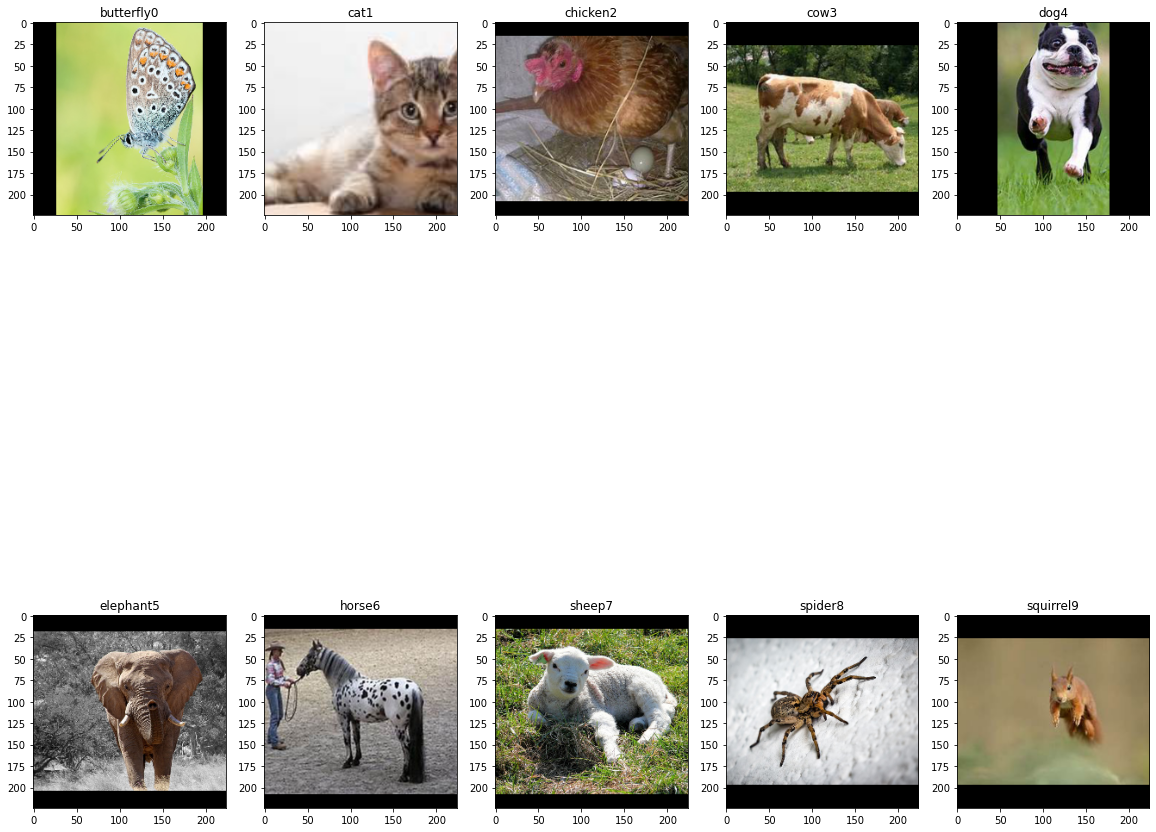

In [10]:
rows,cols = 2,5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,20))
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    
    axes[i//cols, i%cols].set_title(path[0].split('/')[-2] + str(path[1]))
    axes[i//cols, i%cols].imshow(images[train_df[train_df.filename == path[0]].index[0]])

In [11]:
data_num = len(y)
random_index = np.random.permutation(data_num)       
x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])
    
x = np.array(x_shuffle)                              
y = np.array(y_shuffle)                              
val_split_num = int(round(0.2*len(y)))               
x_train = x[val_split_num:]                          
y_train = y[val_split_num:]
x_test = x[:val_split_num] 
y_test = y[:val_split_num]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
y_train = to_categorical(y_train)                    
y_test = to_categorical(y_test)                      

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

img_rows, img_cols, img_channel = 224, 224, 3
name_animal = []
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    if path[0].split('/')[-2] == 'squirrel':
        name_animal.append('squirrel')
    elif path[0].split('/')[-2] == 'horse':
        name_animal.append('horse')
    elif path[0].split('/')[-2] == 'butterfly':
        name_animal.append('butterfly')
    elif path[0].split('/')[-2] == 'cow':
        name_animal.append('cow')
    elif path[0].split('/')[-2] == 'cat':
        name_animal.append('cat')
    elif path[0].split('/')[-2] == 'sheep':
        name_animal.append('sheep')
    elif path[0].split('/')[-2] == 'chicken':
        name_animal.append('chicken')
    elif path[0].split('/')[-2] == 'elephant':
        name_animal.append('elephant')
    elif path[0].split('/')[-2] == 'spider':
        name_animal.append('spider')
    elif path[0].split('/')[-2] == 'dog':
        name_animal.append('dog')

x_train (4000, 224, 224, 3)
y_train (4000,)
x_test (1000, 224, 224, 3)
y_test (1000,)


In [12]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
batch_size = 32                       
epochs = 10                           

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)


history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('animal-recognition.model', monitor='val_acc')]
)

Epoch 1/10
125/125 [==============================] - 1703s 14s/step - loss: 1.9804 - acc: 0.3185 - val_loss: 1.2476 - val_acc: 0.5700
Epoch 2/10
125/125 [==============================] - 1674s 13s/step - loss: 1.0503 - acc: 0.6535 - val_loss: 0.7276 - val_acc: 0.7460
Epoch 3/10
125/125 [==============================] - 1671s 13s/step - loss: 0.6995 - acc: 0.7595 - val_loss: 0.5177 - val_acc: 0.8160
Epoch 4/10
125/125 [==============================] - 1664s 13s/step - loss: 0.5309 - acc: 0.8263 - val_loss: 0.4643 - val_acc: 0.8340
Epoch 5/10
125/125 [==============================] - 1670s 13s/step - loss: 0.4243 - acc: 0.8545 - val_loss: 0.3247 - val_acc: 0.8930
Epoch 6/10
125/125 [==============================] - 1661s 13s/step - loss: 0.3431 - acc: 0.8863 - val_loss: 0.3913 - val_acc: 0.8610
Epoch 7/10
125/125 [==============================] - 1667s 13s/step - loss: 0.2924 - acc: 0.8980 - val_loss: 0.2689 - val_acc: 0.8950
Epoch 8/10
125/125 [==============================] - 1

In [24]:
model.save('animal-recognition.h5')
del model

In [25]:
model = load_model('animal-recognition.h5')
model.load_weights('animal-recognition.model')

CNN: Epochs=10, Train accuracy=0.93575, Validation accuracy=0.90800


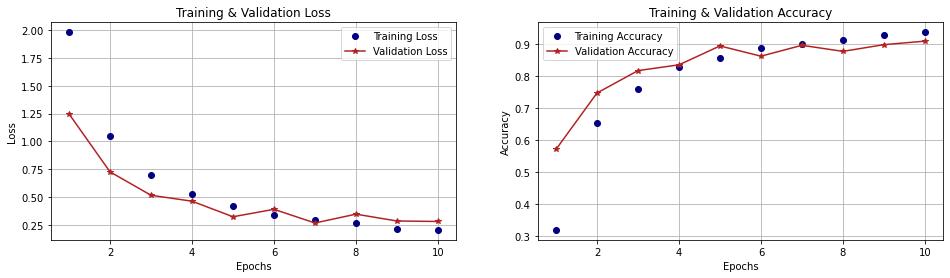

In [26]:
print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals
show_plots(history.history)

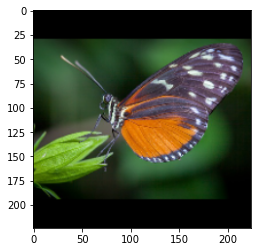

Actual  : butterfly
Predict : butterfly  with chance 100.00%


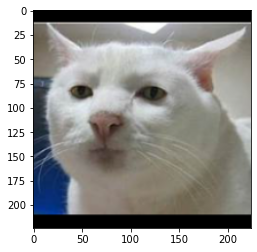

Actual  : cat
Predict : cat  with chance 100.00%


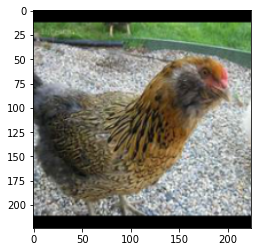

Actual  : chicken
Predict : chicken  with chance 100.00%


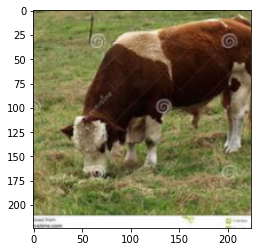

Actual  : cow
Predict : cow  with chance 100.00%


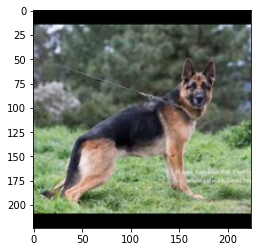

Actual  : dog
Predict : dog  with chance 100.00%


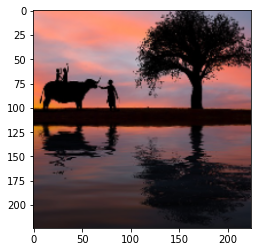

Actual  : elephant
Predict : cow  with chance 100.00%


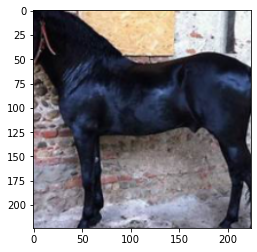

Actual  : horse
Predict : horse  with chance 100.00%


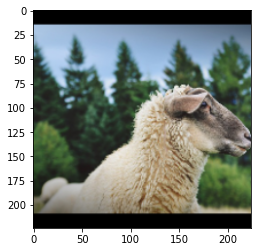

Actual  : sheep
Predict : chicken  with chance 100.00%


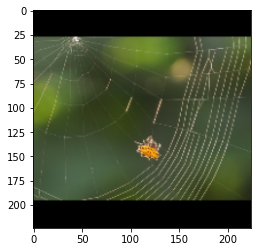

Actual  : spider
Predict : butterfly  with chance 100.00%


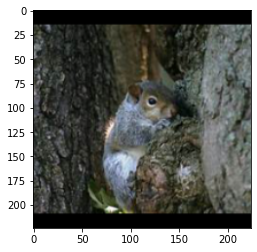

Actual  : squirrel
Predict : squirrel  with chance 100.00%


In [27]:
test_images = []


j = 72 
for i in range(10):
    path = train_df[train_df.category == i].values[j]
    a = images[train_df[train_df.filename == path[0]].index[0]]
    img = np.array(a)
    img = img[:, :, ::-1].copy() 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(img.shape[0] > img.shape[1]):
        tile_size = (int(img.shape[1]*256/img.shape[0]),256)
    else:
        tile_size = (256, int(img.shape[0]*256/img.shape[1]))
    img = centering_image(cv2.resize(img, dsize=tile_size))
    img = img[16:240, 16:240]
    test_images.append(img)

test_images = np.array(test_images).reshape(-1,224,224,3)
something = model.predict(test_images)
animals = name_animal
i = 0
for pred in something:
    path = train_df[train_df.category == i].values[2]
    plt.imshow(test_images[i])
    plt.show()
    print('Actual  :', animals[i])
    for num in pred:
        if(num > 0.01):
            print('Predict :', animals[np.where(num == pred)[0][0]],' with chance {0:.2f}%'.format(num * 100))
    i += 1
